In [ ]:
# open-data for mining: https://www.mindat.org/
#see Anis from p100

# pour données agrégées https://www.world-mining-data.info/?World_Mining_Data___Data_Section

# A global-scale data set of mining areas https://www.nature.com/articles/s41597-020-00624-w -> for download:  https://doi.org/10.1594/PANGAEA.910894 

# BDD USGS: https://mrdata.usgs.gov/
#-> https://mrdata.usgs.gov/mineral-operations/

#https://www2.bgs.ac.uk/mineralsuk/statistics/wms.cfc?method=searchWMS


# d'abord tester pour pays, puis tester pour localités : scrapping par pays sur mindat.org pour lieux, puis géoloc puis données enviro

#passer par selenium pour récupérer liste localisations sur mindat.org??? 

## pour zip: 
#import zipfile
#with zipfile.ZipFile("file.zip","r") as zip_ref:
#    zip_ref.extractall("targetdir")


In [2]:
# liste des modules et librairies à installer/importer

import pandas as pd
import numpy as np
!pip install -U scikit-learn
import sklearn
from sklearn.linear_model import LinearRegression
import scipy
import requests
import matplotlib.pyplot as plt

import json
from pandas.io.json import json_normalize

#pour données géo et visualisations sur cartes
!pip install geopandas
import geopandas as gpd
!pip install geoplot 
import geoplot
import geopandas.tools
from shapely.geometry import Point, Polygon
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import folium

!pip install contextily
import contextily as ctx
import matplotlib.pyplot as plt

import matplotlib.cm as cm
import matplotlib.colors as colors

!pip install openpyxl
import openpyxl

# pour webscrapping
!pip install selenium
import selenium
from bs4 import BeautifulSoup
!pip install lxml
import lxml

import zipfile
import os
import glob
import io

# pour obtenir données de Maus, V., Giljum, S., Gutschlhofer, J. et al. A global-scale data set of mining areas. Sci Data 7, 289 (2020). https://doi.org/10.1038/s41597-020-00624-w
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done


In [ ]:
## fonction qui récupère coordonnées mine/localité

address = 'Rome, IT'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinateprint('The geographical coordinate of Rome are {},
{}.'.format(latitude, longitude))




In [ ]:
# fonction pour scrapper les localités

In [72]:
# parts de production minéraux, par pays

url_csv = "https://www.world-mining-data.info/wmd/downloads/XLS/6.5.%20Share_of_World_Mineral_Production_2020_by_Countries.xlsx"
#s = requests.get(url_csv).content
#shares_prod_2020 = pd.read_excel(url_csv)
shares_prod_2020 = pd.ExcelFile(url_csv)
#print(type(shares_prod_2020))

df_copper = pd.read_excel(shares_prod_2020, 'Copper')
df_copper

,"6.5. Share of World Mineral Production 2020, by Countries; column A Rank in 2020, column B Rank in 2019, column C Country, column D physical unit, column E production in 2020, column F Share of Total in %, column G Cumulative Share in %, column H is HHI: Herfindahl-Hirschman Index as a measure of market concentrations (details see Chapter 4.6)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Rank 2020,Rank 2019,Country,unit,Production 2020,Share in %,Share cum.%,Share HHI
1,1,( 1),Chile,metr. t,5733100,27.57841,27.57841,760.568703
2,2,( 2),Peru,metr. t,2150126,10.342931,37.921341,106.976218
3,3,( 3),China,metr. t,1718940,8.268761,46.190102,68.372404
4,4,( 4),"Congo, D.R.",metr. t,1712964,8.240014,54.430116,67.897829
5,5,( 5),United States,metr. t,1200000,5.77246,60.202576,33.321298
6,6,( 7),Russia,metr. t,924100,4.445275,64.647851,19.760474
7,7,( 8),Zambia,metr. t,882061,4.243052,68.890903,18.003488
8,8,( 6),Australia,metr. t,879522,4.230838,73.121741,17.899992
9,9,( 9),Mexico,metr. t,800316,3.849827,76.971568,14.821167


/opt/mamba/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


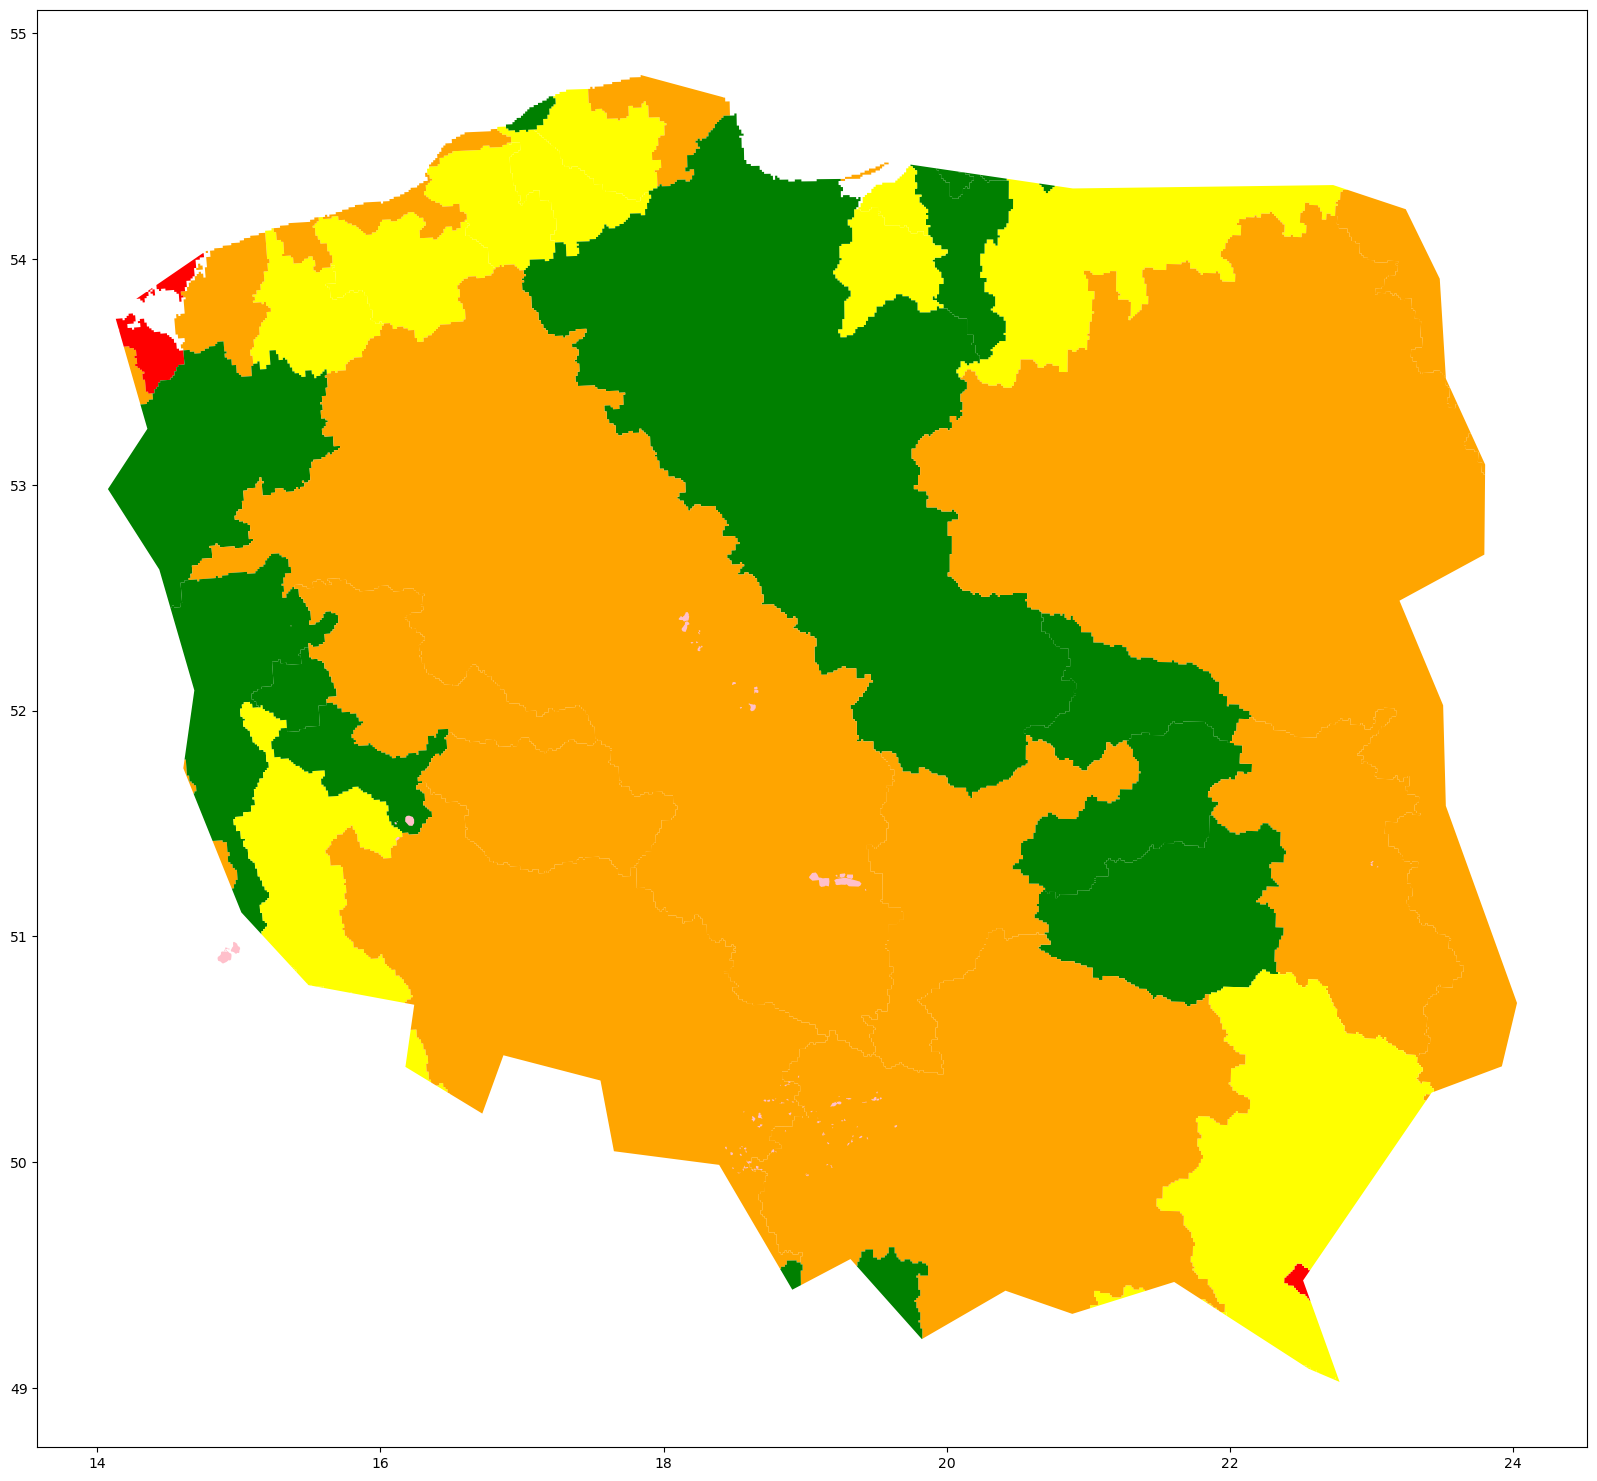

In [6]:
def mining_stress_country(the_country):
    # liste des noms de pays dispo par world.name.values
    
    # Importation données zones minières, à partir de Maus, V., Giljum, S., Gutschlhofer, J. et al. A global-scale data set of mining areas. Sci Data 7, 289 (2020). https://doi.org/10.1038/s41597-020-00624-w
    #from io import BytesIO
    #from zipfile import ZipFile
    #from urllib.request import urlopen
    file = "global_mining_polygons_v1.gpkg"
    resp = urlopen("https://store.pangaea.de/Publications/Maus-etal_2020/Global_mining.zip")
    myzip = ZipFile(BytesIO(resp.read()))
    #myzip.namelist()
    df = gpd.read_file(myzip.open('global_mining_polygons_v1.gpkg'))
    
    # attention correspondance pays
    dico_correspondance_pays = {'Afghanistan':"", 'Albania': 'Albania', 'Algeria': 'Algeria', 'Angola': 'Angola', 'Antarctica':"", 'Argentina': 'Argentina', 'Armenia': 'Armenia','Australia': 'Australia', 'Austria': 'Austria', 'Azerbaijan': 'Azerbaijan', 'Bahamas':"", 'Bangladesh': 'Bangladesh','Bolivia': 'Bolivia', 'Belgium':"", 'Belize':"", 'Benin':"", 'Bosnia and Herz.': 'Bosnia and Herzegovina', 'Botswana': 'Botswana', 'Brazil': 'Brazil', 'Brunei':"", 'Bulgaria': 'Bulgaria', "Côte d'Ivoire": 'Côte D’Ivoire', 'Burkina Faso': 'Burkina Faso', 'Burundi':"", 'Cambodia':"", 'Cameroon':"", 'Canada': 'Canada', 'Central African Rep.':"", 'Chad':"", 'Chile': 'Chile', 'China': 'China', 'Colombia': 'Colombia', 'Costa Rica': 'Costa Rica', 'Croatia':"", 'Cuba': 'Cuba', 'Cyprus': 'Cyprus', 'Czechia': 'Czechia','Dem. Rep. Congo': 'Democratic Republic of The Congo','Dominican Rep.': 'Dominican Republic','Congo':"", 'Denmark':"", 'Djibouti':"", 'Ecuador': 'Ecuador', 'El Salvador':"",'Egypt': 'Egypt', 'Eq. Guinea':"", 'Eritrea': 'Eritrea', 'Estonia':"", 'Ethiopia': 'Ethiopia','Fiji': 'Fiji', 'Falkland Is.':"", 'Finland': 'Finland', 'Fr. S. Antarctic Lands':"", 'France': 'France', 'Gabon': 'Gabon', 'Gambia':"", 'Georgia': 'Georgia', 'Germany': 'Germany', 'Ghana': 'Ghana','Greece': 'Greece', 'Guatemala': 'Guatemala', 'Guinea': 'Guinea', 'Guinea-Bissau': 'Guinea-Bissau', 'Haiti':"",'Guyana': 'Guyana','Honduras': 'Honduras', 'Hungary': 'Hungary', 'Iceland':"", 'India': 'India', 'Indonesia': 'Indonesia', 'Iran': 'Iran', 'Iraq': 'Iraq','Ireland': 'Ireland', 'Israel': 'Israel', 'Italy': 'Italy','Jamaica': 'Jamaica', 'Japan': 'Japan', 'Jordan': 'Jordan', 'Kazakhstan': 'Kazakhstan', 'Kenya': 'Kenya','Kyrgyzstan': 'Kyrgyzstan', 'Kosovo':"", 'Kuwait':"", 'Laos': 'Laos', 'Latvia':"", 'Lebanon':"", 'Lesotho': 'Lesotho','Liberia': 'Liberia', 'Libya':"", 'Lithuania':"", 'Madagascar': 'Madagascar', 'Malawi': 'Malawi', 'Malaysia': 'Malaysia','Mali': 'Mali', 'Mauritania': 'Mauritania', 'Mexico': 'Mexico', 'Moldova':"", 'Mongolia': 'Mongolia','Montenegro': 'Montenegro', 'Morocco': 'Morocco', 'Mozambique': 'Mozambique', 'Myanmar': 'Myanmar/Burma', 'N. Cyprus':"", 'Namibia': 'Namibia', 'Nepal':"", 'Netherlands':"", 'New Caledonia': 'New Caledonia', 'New Zealand': 'New Zealand', 'Nicaragua': 'Nicaragua', 'Niger': 'Niger','North Korea': 'North Korea', 'Nigeria':"", 'North Macedonia': 'North Macedonia', 'Norway': 'Norway', 'Oman': 'Oman', 'Pakistan': 'Pakistan', 'Panama': 'Panama','Papua New Guinea': 'Papua New Guinea', 'Paraguay':"", 'Peru': 'Peru','Philippines': 'Philippines', 'Poland': 'Poland', 'Portugal': 'Portugal', 'Puerto Rico':"",'Romania': 'Romania', 'Qatar':"", 'Russia': 'Russian Federation','Rwanda': 'Rwanda', 'S. Sudan':"",'Saudi Arabia': 'Saudi Arabia', 'Senegal': 'Senegal', 'Serbia': 'Serbia', 'Sierra Leone': 'Sierra Leone','Slovakia': 'Slovakia', 'Slovenia': 'Slovenia', 'Solomon Is.': 'Solomon Islands', 'Somalia':"",'South Africa': 'South Africa', 'Somaliland':"", 'South Korea': 'South Korea', 'Spain': 'Spain', 'Sri Lanka':"", 'Sudan': 'Sudan', 'Suriname': 'Suriname', 'Sweden': 'Sweden', 'Switzerland':"", 'Syria':"", 'Taiwan':"", 'Tajikistan': 'Tajikistan', 'Tanzania': 'United Republic of Tanzania', 'Thailand': 'Thailand', 'Timor-Leste':"", 'Trinidad and Tobago':"", 'Tunisia': 'Tunisia', 'Turkey': 'Turkey', 'Turkmenistan':"", 'Uganda': 'Uganda', 'Ukraine': 'Ukraine','United Kingdom':'United Kingdom','United Arab Emirates': 'United Arab Emirates','United States of America': 'United States', 'Uruguay': 'Uruguay', 'Uzbekistan': 'Uzbekistan', 'Venezuela': 'Venezuela', 'Vietnam': 'Vietnam', 'W. Sahara': 'Western Sahara', 'Yemen':"", 'Zambia': 'Zambia', 'Zimbabwe': 'Zimbabwe','Belarus':"",'Bhutan':"",'eSwatini':"",'Greenland':"",'Luxembourg':"",'Palestine':"",'Togo':"",'Vanuatu':""}

    ### importation data stress hydrique
    url_stress = "https://wri-public-data.s3.amazonaws.com/resourcewatch/wat_006_projected_water_stress.zip"
    df_stress = gpd.read_file(url_stress)
    
    #Code couleur et scénario
    
    scenario = 'ws3038tl'
    # voir aqueduct_projections_schematic_20140615.xlsx dans le zip pour les scénarii
    
    conditions = [
    (df_stress[scenario] == 'Low (<10%)'),
    (df_stress[scenario] == 'Extremely high (>80%)'),
    (df_stress[scenario] == 'High (40-80%)'),
    (df_stress[scenario] == 'Medium-high (20-40%)'),
    (df_stress[scenario] == 'Low-medium (10-20%)'),
    (df_stress[scenario] == 'No data'),
    (df_stress[scenario] == 'Arid and low water use'),
    ]
    values = ['green', 'black', 'red', 'orange','yellow',"grey", 'purple']
    
    df_stress['Color'] = np.select(conditions, values) #ajoute colonne avec couleurs
    
    # besoin de import geopandas.tools
    # data limites des pays
    countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    #df_total = gpd.tools.sjoin(df_stress, countries, how="left") 
    df_total = df_stress.overlay(countries, how="intersection")
    
    data_country = df.loc[df['COUNTRY_NAME'] == dico_correspondance_pays[the_country]]
    
    data_pays = df_total.loc[df_total['name'] == the_country]
    
    base_graphe = data_pays.plot(color=data_pays['Color'], figsize=(20, 20)) #result.plot(thisCountry, color=df_stress['Color'], figsize=(20, 20)) #geoplot.polyplot(thisCountry, hue=result['Color'], edgecolor='gray', ax=ax, figsize=(15, 15));
    #base_graphe = data_pays.plot(color='red')
    data_country.plot(ax=base_graphe, color='pink');
    #data_pays.plot(ax=base_graphe, color=data_pays['Color'], figsize=(20, 20));
        
    
mining_stress_country('Poland')
# pooVérif possible en partie avec : https://www.wri.org/applications/aqueduct/water-risk-atlas/#/?advanced=false&basemap=hydro&indicator=w_awr_def_tot_cat&lat=30&lng=-80&mapMode=view&month=1&opacity=0.5&ponderation=DEF&predefined=false&projection=absolute&scenario=optimistic&scope=baseline&threshold&timeScale=annual&year=baseline&zoom=3


In [ ]:
### test résolution géométries

url_stress = "https://wri-public-data.s3.amazonaws.com/resourcewatch/wat_006_projected_water_stress.zip"
df_stress1 = gpd.read_file(url_stress)
countries1 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
scenario1 = 'ws3038tl'
    # voir aqueduct_projections_schematic_20140615.xlsx dans le zip pour les scénarii
    

    
#df_stress['Color'] = np.select(conditions, values) #ajoute colonne avec couleurs

## Countries est OK

#countries.loc[countries['name'] == "France"].plot()

#total_test = gpd.tools.overlay(df_stress, countries, how="intersection")
#total_test = gpd.merge(df_stress, countries)
#total_test = countries.sjoin(df_stress, how="left", predicate='intersects')

total_test1 = df_stress1
conditions = [
    (total_test1[scenario1] == 'Low (<10%)'),
    (total_test1[scenario1] == 'Extremely high (>80%)'),
    (total_test1[scenario1] == 'High (40-80%)'),
    (total_test1[scenario1] == 'Medium-high (20-40%)'),
    (total_test1[scenario1] == 'Low-medium (10-20%)'),
    (total_test1[scenario1] == 'No data'),
    (total_test1[scenario1] == 'Arid and low water use'),
    ]
values = ['green', 'black', 'red', 'orange','yellow',"grey", 'purple']

total_test1['Color'] = np.select(conditions, values)
#total_test1
#total_test1.loc[total_test1['name'] == "France"].plot(color=total_test1['Color'], figsize=(20, 20))
total_test11 = total_test1.overlay(countries, how = "intersection")
#total_test11.plot(color=total_test11['Color'], figsize=(20, 20))
total_test11.loc[total_test11['name'] == "France"].plot(color=total_test11['Color'], figsize=(20, 20))


In [ ]:
url_stress = "https://wri-public-data.s3.amazonaws.com/resourcewatch/wat_006_projected_water_stress.zip"
df_stress2 = gpd.read_file(url_stress)
countries2 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
scenario2 = 'ws3038tl'

total_test2 = countries2.overlay(df_stress2, how = "intersection")
#total_test.loc[total_test['name'] == "France"].plot(color=total_test['Color'], figsize=(20, 20))


conditions2 = [
    (total_test2[scenario2] == 'Low (<10%)'),
    (total_test2[scenario2] == 'Extremely high (>80%)'),
    (total_test2[scenario2] == 'High (40-80%)'),
    (total_test2[scenario2] == 'Medium-high (20-40%)'),
    (total_test2[scenario2] == 'Low-medium (10-20%)'),
    (total_test2[scenario2] == 'No data'),
    (total_test2[scenario2] == 'Arid and low water use'),
    ]
values = ['green', 'black', 'red', 'orange','yellow',"grey", 'purple']

total_test2['Color'] = np.select(conditions2, values)
#total_test2
#total_test2.plot(color=total_test2['Color'], figsize=(20, 20))
total_test2.loc[total_test2['name'] == "France"].plot(color=total_test2['Color'], figsize=(20, 20))
#total_test2.columns.values
#

In [ ]:
total_test2.loc[total_test2['name'] == "Australia"].plot(color=total_test2['Color'], figsize=(20, 20))

In [ ]:
countries2


In [ ]:
    file = "global_mining_polygons_v1.gpkg"
    resp = urlopen("https://store.pangaea.de/Publications/Maus-etal_2020/Global_mining.zip")
    myzip = ZipFile(BytesIO(resp.read()))
    #myzip.namelist()
    df = gpd.read_file(myzip.open('global_mining_polygons_v1.gpkg'))
    df

In [ ]:
total_test2_index = total_test2.set_index(keys = "BasinID")
total_test2_index
print(total_test2['ws2024tl'].unique())


In [ ]:
print(len(total_test2))
print(len(total_test11))

total_test2['ws3038tl'].equals(total_test11['ws3038tl'])

In [ ]:
print(len(countries))

In [6]:
file = "global_mining_polygons_v1.gpkg"
resp = urlopen("https://store.pangaea.de/Publications/Maus-etal_2020/Global_mining.zip")
myzip = ZipFile(BytesIO(resp.read()))
    #myzip.namelist()
df1 = gpd.read_file(myzip.open('global_mining_polygons_v1.gpkg'))
df1

df_areas_by_country = df1.groupby(['COUNTRY_NAME']).sum()



/tmp/ipykernel_222/2722222155.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_areas_by_country = df1.groupby(['COUNTRY_NAME']).sum()


In [20]:
url_stress = "https://wri-public-data.s3.amazonaws.com/resourcewatch/wat_006_projected_water_stress.zip"
df_stress = gpd.read_file(url_stress)
df_stress


,BasinID,dwnBasinID,Area_km2,Shape_Leng,ws2024tr,ws2024tl,ws3024tr,ws3024tl,ws4024tr,ws4024tl,...,sv4028ul,sv2038ur,sv2038ul,sv3038ur,sv3038ul,sv4038ur,sv4038ul,Shape_Le_1,Shape_Area,geometry
0,1,0,2085,0.0,0.860153,Extremely high (>80%),1.058204,Extremely high (>80%),1.098187,Extremely high (>80%),...,High uncertainty,0.276085,High uncertainty,0.303592,High uncertainty,0.304096,High uncertainty,4.197305,0.196370,"POLYGON ((25.95065 30.98011, 25.97108 30.97973..."
1,2,0,2373,0.0,3.257008,Extremely high (>80%),3.086548,Extremely high (>80%),2.947359,Extremely high (>80%),...,High uncertainty,0.234488,High uncertainty,0.253703,High uncertainty,0.264467,High uncertainty,3.597165,0.223965,"POLYGON ((25.23877 31.29695, 25.23919 31.30616..."
2,3,0,1509,0.0,2.595165,Extremely high (>80%),2.786326,Extremely high (>80%),2.517074,Extremely high (>80%),...,High uncertainty,0.276976,High uncertainty,0.304777,High uncertainty,0.304962,High uncertainty,2.478102,0.142297,"MULTIPOLYGON (((26.94686 31.21756, 26.94741 31..."
3,4,0,4113,0.0,1.327963,Extremely high (>80%),1.492594,Extremely high (>80%),1.520199,Extremely high (>80%),...,High uncertainty,0.242970,High uncertainty,0.263880,High uncertainty,0.255351,High uncertainty,4.621268,0.386641,"POLYGON ((27.62277 30.56665, 27.61258 30.56690..."
4,5,0,4454,0.0,0.418429,Arid and low water use,0.684660,Arid and low water use,0.943055,Arid and low water use,...,High uncertainty,0.279182,High uncertainty,0.294587,High uncertainty,0.287821,High uncertainty,4.833261,0.417697,"POLYGON ((27.62277 30.56665, 27.66352 30.56566..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15001,14995,14992,31186,1398000.0,0.000103,Low (<10%),0.000101,Low (<10%),0.000095,Low (<10%),...,Moderate uncertainty,0.124090,Moderate uncertainty,0.115213,Moderate uncertainty,0.104138,Moderate uncertainty,12.568120,2.529173,"POLYGON ((-76.41211 -4.91330, -76.42118 -4.912..."
15002,14996,14995,33134,1546000.0,0.024134,Low (<10%),0.024502,Low (<10%),0.025349,Low (<10%),...,Moderate uncertainty,0.094611,Moderate uncertainty,0.099002,Moderate uncertainty,0.093499,Moderate uncertainty,13.902523,2.684545,"POLYGON ((-77.96772 -2.10359, -77.96934 -2.157..."
15003,14997,14995,83951,3110000.0,0.088505,Low (<10%),0.081819,Low (<10%),0.081719,Low (<10%),...,Low uncertainty,0.072456,Low uncertainty,0.058497,Low uncertainty,0.075819,Low uncertainty,28.033493,6.838332,"POLYGON ((-77.62190 -4.44249, -77.62539 -4.531..."
15004,14499,14404,13649,958000.0,0.000001,Low (<10%),0.000001,Low (<10%),0.000001,Low (<10%),...,Low uncertainty,0.042137,Low uncertainty,0.038683,Low uncertainty,0.038899,Low uncertainty,8.620168,1.104437,"MULTIPOLYGON (((-52.85209 -1.52796, -52.85140 ..."


In [22]:

countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

scenario_quanti = 'ws3038tr'

#df_total = gpd.tools.sjoin(df_stress, countries, how="left") 
df_stress_wcountries = df_stress.overlay(countries, how="intersection")
df_stress_countries = df_stress_wcountries[[scenario_quanti, 'COUNTRY_NAME']].groupby(['COUNTRY_NAME']).mean()
df_stress_countries

/opt/mamba/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


KeyError: "['COUNTRY_NAME'] not in index"

<AxesSubplot: >

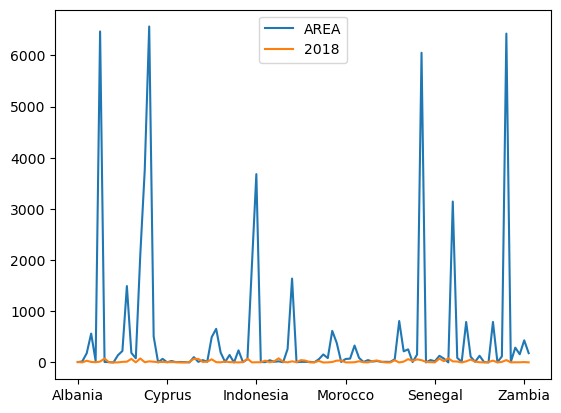

In [12]:
# Annual freshwater withdrawals, industry (% of total freshwater withdrawal)
url_industry = "https://api.worldbank.org/v2/en/indicator/ER.H2O.FWIN.ZS?downloadformat=csv"

resp = urlopen(url_industry)
myzip1 = ZipFile(BytesIO(resp.read()))
df3 = pd.read_csv(myzip1.open('API_ER.H2O.FWIN.ZS_DS2_en_csv_v2_4538237.csv'), skiprows=3)

df3_2018 = df3[["Country Name","2018"]]
df3_2018 = df3_2018.set_index("Country Name")

df_area_water_stress = pd.concat([df_areas_by_country, df3_2018], axis=1, join="inner").dropna()
df_area_water_stress.plot()

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(df_area_water_stress.loc[:,["AREA"]],df_area_water_stress.loc[:,["2018"]])


#reg.fit(X, y[, sample_weight])
reg.score(df_area_water_stress.loc[:,["AREA"]],df_area_water_stress.loc[:,["2018"]])
#reg.get_params()
#predict(X)
# score(X, y[, sample_weight])
# set_params(**params)

print("Coefficients: \n", reg.coef_)



Coefficients: 
 [[0.00157451]]


In [8]:
# get water data from World Bank API

url_API_WB = "https://api.worldbank.org/v2/en/indicator/ER.H2O.FWST.ZS?downloadformat=csv"
#Level of water stress: freshwater withdrawal as a proportion of available freshwater resources
#req = requests.get(url_API_WB)
#print(req.content[:1000])

#dataframe = pd.read_csv(url_API_WB, compression='zip')

resp = urlopen(url_API_WB)
myzip1 = ZipFile(BytesIO(resp.read()))
myzip1.namelist()
#myzip.open('API_ER.H2O.FWST.ZS_DS2_en_csv_v2_4532033.csv')
df2 = pd.read_csv(myzip1.open('API_ER.H2O.FWST.ZS_DS2_en_csv_v2_4532033.csv'), skiprows=3) #besoin de sauter premieres lignes pour import. 3 lignes pour avoir noms colonnes
#df2

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Level of water stress: freshwater withdrawal a...,ER.H2O.FWST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Level of water stress: freshwater withdrawal a...,ER.H2O.FWST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Level of water stress: freshwater withdrawal a...,ER.H2O.FWST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,54.757019,54.757019,54.757019,54.757019,54.757019,54.757019,54.757019,NaN,NaN,NaN
3,Africa Western and Central,AFW,Level of water stress: freshwater withdrawal a...,ER.H2O.FWST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Level of water stress: freshwater withdrawal a...,ER.H2O.FWST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.871883,1.871883,1.871883,1.871883,1.871883,1.871883,1.871883,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Level of water stress: freshwater withdrawal a...,ER.H2O.FWST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Level of water stress: freshwater withdrawal a...,ER.H2O.FWST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,169.761905,169.761905,169.761905,169.761905,169.761905,169.761905,169.761905,NaN,NaN,NaN
263,South Africa,ZAF,Level of water stress: freshwater withdrawal a...,ER.H2O.FWST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,45.744476,52.747358,59.750240,60.999039,62.055716,63.560679,63.560679,NaN,NaN,NaN
264,Zambia,ZMB,Level of water stress: freshwater withdrawal a...,ER.H2O.FWST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.835498,2.835498,2.835498,2.835498,2.835498,2.835498,2.835498,NaN,NaN,NaN


In [3]:
# Travail 29/11/2022 -> test avec des données mindat


file = "global_mining_polygons_v1.gpkg"
resp = urlopen("https://store.pangaea.de/Publications/Maus-etal_2020/Global_mining.zip")
myzip = ZipFile(BytesIO(resp.read()))

df = gpd.read_file(myzip.open('global_mining_polygons_v1.gpkg'))
    
    # attention correspondance pays
dico_correspondance_pays = {'Afghanistan':"", 'Albania': 'Albania', 'Algeria': 'Algeria', 'Angola': 'Angola', 'Antarctica':"", 'Argentina': 'Argentina', 'Armenia': 'Armenia','Australia': 'Australia', 'Austria': 'Austria', 'Azerbaijan': 'Azerbaijan', 'Bahamas':"", 'Bangladesh': 'Bangladesh','Bolivia': 'Bolivia', 'Belgium':"", 'Belize':"", 'Benin':"", 'Bosnia and Herz.': 'Bosnia and Herzegovina', 'Botswana': 'Botswana', 'Brazil': 'Brazil', 'Brunei':"", 'Bulgaria': 'Bulgaria', "Côte d'Ivoire": 'Côte D’Ivoire', 'Burkina Faso': 'Burkina Faso', 'Burundi':"", 'Cambodia':"", 'Cameroon':"", 'Canada': 'Canada', 'Central African Rep.':"", 'Chad':"", 'Chile': 'Chile', 'China': 'China', 'Colombia': 'Colombia', 'Costa Rica': 'Costa Rica', 'Croatia':"", 'Cuba': 'Cuba', 'Cyprus': 'Cyprus', 'Czechia': 'Czechia','Dem. Rep. Congo': 'Democratic Republic of The Congo','Dominican Rep.': 'Dominican Republic','Congo':"", 'Denmark':"", 'Djibouti':"", 'Ecuador': 'Ecuador', 'El Salvador':"",'Egypt': 'Egypt', 'Eq. Guinea':"", 'Eritrea': 'Eritrea', 'Estonia':"", 'Ethiopia': 'Ethiopia','Fiji': 'Fiji', 'Falkland Is.':"", 'Finland': 'Finland', 'Fr. S. Antarctic Lands':"", 'France': 'France', 'Gabon': 'Gabon', 'Gambia':"", 'Georgia': 'Georgia', 'Germany': 'Germany', 'Ghana': 'Ghana','Greece': 'Greece', 'Guatemala': 'Guatemala', 'Guinea': 'Guinea', 'Guinea-Bissau': 'Guinea-Bissau', 'Haiti':"",'Guyana': 'Guyana','Honduras': 'Honduras', 'Hungary': 'Hungary', 'Iceland':"", 'India': 'India', 'Indonesia': 'Indonesia', 'Iran': 'Iran', 'Iraq': 'Iraq','Ireland': 'Ireland', 'Israel': 'Israel', 'Italy': 'Italy','Jamaica': 'Jamaica', 'Japan': 'Japan', 'Jordan': 'Jordan', 'Kazakhstan': 'Kazakhstan', 'Kenya': 'Kenya','Kyrgyzstan': 'Kyrgyzstan', 'Kosovo':"", 'Kuwait':"", 'Laos': 'Laos', 'Latvia':"", 'Lebanon':"", 'Lesotho': 'Lesotho','Liberia': 'Liberia', 'Libya':"", 'Lithuania':"", 'Madagascar': 'Madagascar', 'Malawi': 'Malawi', 'Malaysia': 'Malaysia','Mali': 'Mali', 'Mauritania': 'Mauritania', 'Mexico': 'Mexico', 'Moldova':"", 'Mongolia': 'Mongolia','Montenegro': 'Montenegro', 'Morocco': 'Morocco', 'Mozambique': 'Mozambique', 'Myanmar': 'Myanmar/Burma', 'N. Cyprus':"", 'Namibia': 'Namibia', 'Nepal':"", 'Netherlands':"", 'New Caledonia': 'New Caledonia', 'New Zealand': 'New Zealand', 'Nicaragua': 'Nicaragua', 'Niger': 'Niger','North Korea': 'North Korea', 'Nigeria':"", 'North Macedonia': 'North Macedonia', 'Norway': 'Norway', 'Oman': 'Oman', 'Pakistan': 'Pakistan', 'Panama': 'Panama','Papua New Guinea': 'Papua New Guinea', 'Paraguay':"", 'Peru': 'Peru','Philippines': 'Philippines', 'Poland': 'Poland', 'Portugal': 'Portugal', 'Puerto Rico':"",'Romania': 'Romania', 'Qatar':"", 'Russia': 'Russian Federation','Rwanda': 'Rwanda', 'S. Sudan':"",'Saudi Arabia': 'Saudi Arabia', 'Senegal': 'Senegal', 'Serbia': 'Serbia', 'Sierra Leone': 'Sierra Leone','Slovakia': 'Slovakia', 'Slovenia': 'Slovenia', 'Solomon Is.': 'Solomon Islands', 'Somalia':"",'South Africa': 'South Africa', 'Somaliland':"", 'South Korea': 'South Korea', 'Spain': 'Spain', 'Sri Lanka':"", 'Sudan': 'Sudan', 'Suriname': 'Suriname', 'Sweden': 'Sweden', 'Switzerland':"", 'Syria':"", 'Taiwan':"", 'Tajikistan': 'Tajikistan', 'Tanzania': 'United Republic of Tanzania', 'Thailand': 'Thailand', 'Timor-Leste':"", 'Trinidad and Tobago':"", 'Tunisia': 'Tunisia', 'Turkey': 'Turkey', 'Turkmenistan':"", 'Uganda': 'Uganda', 'Ukraine': 'Ukraine','United Kingdom':'United Kingdom','United Arab Emirates': 'United Arab Emirates','United States of America': 'United States', 'Uruguay': 'Uruguay', 'Uzbekistan': 'Uzbekistan', 'Venezuela': 'Venezuela', 'Vietnam': 'Vietnam', 'W. Sahara': 'Western Sahara', 'Yemen':"", 'Zambia': 'Zambia', 'Zimbabwe': 'Zimbabwe','Belarus':"",'Bhutan':"",'eSwatini':"",'Greenland':"",'Luxembourg':"",'Palestine':"",'Togo':"",'Vanuatu':""}

    ### importation data stress hydrique
url_stress = "https://wri-public-data.s3.amazonaws.com/resourcewatch/wat_006_projected_water_stress.zip"
df_stress = gpd.read_file(url_stress)
    
    #Code couleur et scénario
    
scenario = 'ws3038tl'
    # voir aqueduct_projections_schematic_20140615.xlsx dans le zip pour les scénarii
    
conditions = [
    (df_stress[scenario] == 'Low (<10%)'),
    (df_stress[scenario] == 'Extremely high (>80%)'),
    (df_stress[scenario] == 'High (40-80%)'),
    (df_stress[scenario] == 'Medium-high (20-40%)'),
    (df_stress[scenario] == 'Low-medium (10-20%)'),
    (df_stress[scenario] == 'No data'),
    (df_stress[scenario] == 'Arid and low water use'),
    ]
values = ['green', 'black', 'red', 'orange','yellow',"grey", 'purple']
    
df_stress['Color'] = np.select(conditions, values) #ajoute colonne avec couleurs

countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    #df_total = gpd.tools.sjoin(df_stress, countries, how="left") 
df_total = df_stress.overlay(countries, how="intersection")



/opt/mamba/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


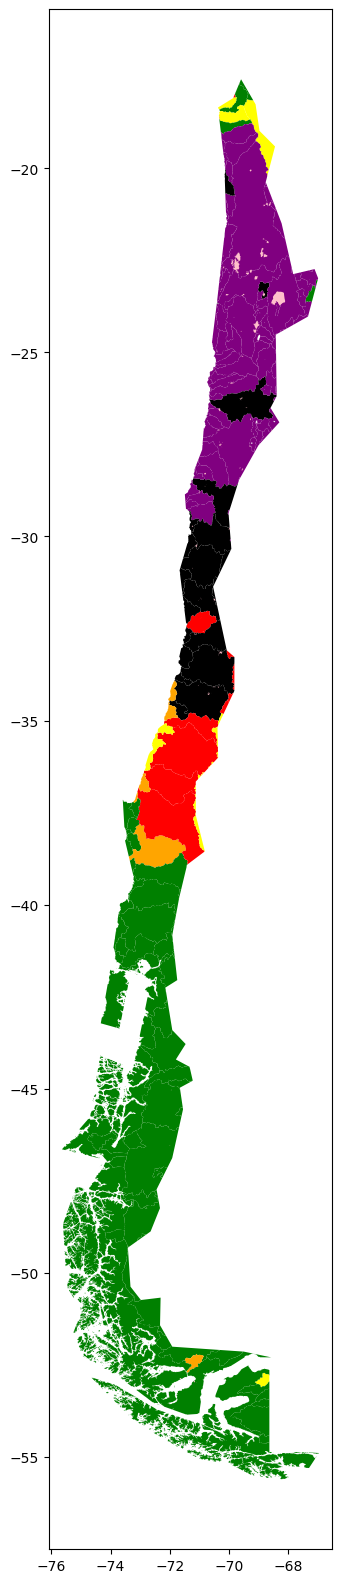

In [4]:
pays = 'Chile'
    
data_country = df.loc[df['COUNTRY_NAME'] == pays]
# data_country.crs # => WGS84 Latitude/Longitude: "EPSG:4326"
    
data_pays = df_total.loc[df_total['name'] == pays]
# data_pays.crs

base_graphe = data_pays.plot(color=data_pays['Color'], figsize=(20, 20)) #result.plot(thisCountry, color=df_stress['Color'], figsize=(20, 20)) #geoplot.polyplot(thisCountry, hue=result['Color'], edgecolor='gray', ax=ax, figsize=(15, 15));
    #base_graphe = data_pays.plot(color='red')
data_country.plot(ax=base_graphe, color='pink');

# vérif : https://www.wri.org/applications/aqueduct/water-risk-atlas/#/?advanced=false&basemap=hydro&indicator=bws_cat&lat=-31.391157522824706&lng=-421.47949218750006&mapMode=view&month=1&opacity=0.5&ponderation=DEF&predefined=false&projection=absolute&scenario=optimistic&scope=baseline&timeScale=annual&year=baseline&zoom=5



In [36]:
df_plane

,ISO3_CODE,COUNTRY_NAME,AREA,geometry,area2
0,GBR,United Kingdom,1.790477,"POLYGON ((-186046.150 7376744.687, -184275.391...",5.453857
1,FJI,Fiji,0.021903,"POLYGON ((19798705.771 -1981123.075, 19798778....",0.024232
2,NZL,New Zealand,0.042341,"POLYGON ((19577980.817 -4487294.276, 19578053....",0.067151
3,FJI,Fiji,0.244604,"POLYGON ((19797352.905 -1981262.338, 19797528....",0.270622
4,FJI,Fiji,0.132164,"POLYGON ((19798113.217 -1978539.352, 19798189....",0.146185
...,...,...,...,...,...
21055,USA,United States,2.275411,"POLYGON ((-8514588.069 4984382.119, -8512027.4...",3.977511
21056,UKR,Ukraine,0.259154,"POLYGON ((4240817.080 6118153.586, 4241175.417...",0.580253
21057,UKR,Ukraine,1.604463,"POLYGON ((4155379.593 6134960.022, 4155580.302...",3.604587
21058,UKR,Ukraine,0.889896,"POLYGON ((4158575.687 6133890.024, 4159373.403...",1.999200


In [3]:
df['AREA'].sum()
# df['area2'].sum()

57277.726703693705

In [67]:
df_total_mining['AREA'].sum()

57277.726703693705

In [ ]:
##df_test2['AREA'].sum()

In [5]:
## Pour pourcentages de surfaces dans zones selon stress
#autres qui ne marchent pas
# première tentative: df_total_mining = df_total_mining[~df_total_mining.index.duplicated(keep='first')]
#df_total_mining2 = df.overlay(df_stress, how="intersection")
#df_test3 = df_total_mining2.sort_values(by=scenario, ascending = False)[~df_total_mining2.index.duplicated(keep='first')]

df_total_mining = gpd.tools.sjoin(df, df_total, how="left")

dico_hierarchie = {'No data' : 0, 
                   'Low (<10%)': 1, 
                   'Low-medium (10-20%)' : 2, 
                   'Medium-high (20-40%)' : 3, 
                   'High (40-80%)': 4, 
                   'Extremely high (>80%)': 5, 
                   'Arid and low water use' : 6}

conditions2 = [
    (df_total_mining[scenario] == 'No data'),
    (df_total_mining[scenario] == 'Low (<10%)'),
    (df_total_mining[scenario] == 'Low-medium (10-20%)'),
    (df_total_mining[scenario] == 'Medium-high (20-40%)'),
    (df_total_mining[scenario] == 'High (40-80%)'),
    (df_total_mining[scenario] == 'Extremely high (>80%)'),
    (df_total_mining[scenario] == 'Arid and low water use'),
    ]
values2 = [0, 1, 2, 3, 4, 5, 6]


df_total_mining['value_risk'] = np.select(conditions2, values2)
#df_total_mining

df_test = df_total_mining.sort_values(by='value_risk', ascending = False).drop_duplicates('AREA',keep='first')

#df_test['AREA'].sum() == df['AREA'].sum()
#df_test['value_risk'].unique(), df_test[scenario].unique()

/opt/mamba/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


In [6]:
dico_hierarchie = {'No data' : 0, 
                   'Low (<10%)': 1, 
                   'Low-medium (10-20%)' : 2, 
                   'Medium-high (20-40%)' : 3, 
                   'High (40-80%)': 4, 
                   'Extremely high (>80%)': 5, 
                   'Arid and low water use' : 6}

group_bystress = df_test.groupby(['value_risk']).sum()


No_data = group_bystress.iat[0,0]/df_test.groupby(['value_risk']).sum()['AREA'].sum()*100
Low = group_bystress.iat[1,0]/df_test.groupby(['value_risk']).sum()['AREA'].sum()*100
Low_medium = group_bystress.iat[2,0]/df_test.groupby(['value_risk']).sum()['AREA'].sum()*100
Medium_high = group_bystress.iat[3,0]/df_test.groupby(['value_risk']).sum()['AREA'].sum()*100
High = group_bystress.iat[4,0]/df_test.groupby(['value_risk']).sum()['AREA'].sum()*100
Extremely_high = group_bystress.iat[5,0]/df_test.groupby(['value_risk']).sum()['AREA'].sum()*100
Arid = group_bystress.iat[6,0]/df_test.groupby(['value_risk']).sum()['AREA'].sum()*100

results_agregate = pd.DataFrame.from_dict({
                   'No data' : [No_data], 
                   'Low (<10%)': [Low], 
                   'Low-medium (10-20%)' : [Low_medium], 
                   'Medium-high (20-40%)' : [Medium_high], 
                   'High (40-80%)': [High], 
                   'Extremely high (>80%)': [Extremely_high], 
                   'Arid and low water use' : [Arid]}, orient = "index", columns = ['Percentage'])

results_agregate
#results_agregate['Percentage'].sum()

/tmp/ipykernel_7010/3836037669.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_bystress = df_test.groupby(['value_risk']).sum()
/tmp/ipykernel_7010/3836037669.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  No_data = group_bystress.iat[0,0]/df_test.groupby(['value_risk']).sum()['AREA'].sum()*100
/tmp/ipykernel_7010/3836037669.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Low = group_bystress.iat[1,0

,Percentage
No data,0.663738
Low (<10%),40.289724
Low-medium (10-20%),7.135874
Medium-high (20-40%),11.977182
High (40-80%),3.469424
Extremely high (>80%),18.323418
Arid and low water use,18.140640


In [ ]:
## nouvelle tentative 02/12/2022 : pour les surfaces: ne pas passer par les pays au début

file = "global_mining_polygons_v1.gpkg"
resp = urlopen("https://store.pangaea.de/Publications/Maus-etal_2020/Global_mining.zip")
myzip = ZipFile(BytesIO(resp.read()))

df = gpd.read_file(myzip.open('global_mining_polygons_v1.gpkg'))
    
    # attention correspondance pays
dico_correspondance_pays = {'Afghanistan':"", 'Albania': 'Albania', 'Algeria': 'Algeria', 'Angola': 'Angola', 'Antarctica':"", 'Argentina': 'Argentina', 'Armenia': 'Armenia','Australia': 'Australia', 'Austria': 'Austria', 'Azerbaijan': 'Azerbaijan', 'Bahamas':"", 'Bangladesh': 'Bangladesh','Bolivia': 'Bolivia', 'Belgium':"", 'Belize':"", 'Benin':"", 'Bosnia and Herz.': 'Bosnia and Herzegovina', 'Botswana': 'Botswana', 'Brazil': 'Brazil', 'Brunei':"", 'Bulgaria': 'Bulgaria', "Côte d'Ivoire": 'Côte D’Ivoire', 'Burkina Faso': 'Burkina Faso', 'Burundi':"", 'Cambodia':"", 'Cameroon':"", 'Canada': 'Canada', 'Central African Rep.':"", 'Chad':"", 'Chile': 'Chile', 'China': 'China', 'Colombia': 'Colombia', 'Costa Rica': 'Costa Rica', 'Croatia':"", 'Cuba': 'Cuba', 'Cyprus': 'Cyprus', 'Czechia': 'Czechia','Dem. Rep. Congo': 'Democratic Republic of The Congo','Dominican Rep.': 'Dominican Republic','Congo':"", 'Denmark':"", 'Djibouti':"", 'Ecuador': 'Ecuador', 'El Salvador':"",'Egypt': 'Egypt', 'Eq. Guinea':"", 'Eritrea': 'Eritrea', 'Estonia':"", 'Ethiopia': 'Ethiopia','Fiji': 'Fiji', 'Falkland Is.':"", 'Finland': 'Finland', 'Fr. S. Antarctic Lands':"", 'France': 'France', 'Gabon': 'Gabon', 'Gambia':"", 'Georgia': 'Georgia', 'Germany': 'Germany', 'Ghana': 'Ghana','Greece': 'Greece', 'Guatemala': 'Guatemala', 'Guinea': 'Guinea', 'Guinea-Bissau': 'Guinea-Bissau', 'Haiti':"",'Guyana': 'Guyana','Honduras': 'Honduras', 'Hungary': 'Hungary', 'Iceland':"", 'India': 'India', 'Indonesia': 'Indonesia', 'Iran': 'Iran', 'Iraq': 'Iraq','Ireland': 'Ireland', 'Israel': 'Israel', 'Italy': 'Italy','Jamaica': 'Jamaica', 'Japan': 'Japan', 'Jordan': 'Jordan', 'Kazakhstan': 'Kazakhstan', 'Kenya': 'Kenya','Kyrgyzstan': 'Kyrgyzstan', 'Kosovo':"", 'Kuwait':"", 'Laos': 'Laos', 'Latvia':"", 'Lebanon':"", 'Lesotho': 'Lesotho','Liberia': 'Liberia', 'Libya':"", 'Lithuania':"", 'Madagascar': 'Madagascar', 'Malawi': 'Malawi', 'Malaysia': 'Malaysia','Mali': 'Mali', 'Mauritania': 'Mauritania', 'Mexico': 'Mexico', 'Moldova':"", 'Mongolia': 'Mongolia','Montenegro': 'Montenegro', 'Morocco': 'Morocco', 'Mozambique': 'Mozambique', 'Myanmar': 'Myanmar/Burma', 'N. Cyprus':"", 'Namibia': 'Namibia', 'Nepal':"", 'Netherlands':"", 'New Caledonia': 'New Caledonia', 'New Zealand': 'New Zealand', 'Nicaragua': 'Nicaragua', 'Niger': 'Niger','North Korea': 'North Korea', 'Nigeria':"", 'North Macedonia': 'North Macedonia', 'Norway': 'Norway', 'Oman': 'Oman', 'Pakistan': 'Pakistan', 'Panama': 'Panama','Papua New Guinea': 'Papua New Guinea', 'Paraguay':"", 'Peru': 'Peru','Philippines': 'Philippines', 'Poland': 'Poland', 'Portugal': 'Portugal', 'Puerto Rico':"",'Romania': 'Romania', 'Qatar':"", 'Russia': 'Russian Federation','Rwanda': 'Rwanda', 'S. Sudan':"",'Saudi Arabia': 'Saudi Arabia', 'Senegal': 'Senegal', 'Serbia': 'Serbia', 'Sierra Leone': 'Sierra Leone','Slovakia': 'Slovakia', 'Slovenia': 'Slovenia', 'Solomon Is.': 'Solomon Islands', 'Somalia':"",'South Africa': 'South Africa', 'Somaliland':"", 'South Korea': 'South Korea', 'Spain': 'Spain', 'Sri Lanka':"", 'Sudan': 'Sudan', 'Suriname': 'Suriname', 'Sweden': 'Sweden', 'Switzerland':"", 'Syria':"", 'Taiwan':"", 'Tajikistan': 'Tajikistan', 'Tanzania': 'United Republic of Tanzania', 'Thailand': 'Thailand', 'Timor-Leste':"", 'Trinidad and Tobago':"", 'Tunisia': 'Tunisia', 'Turkey': 'Turkey', 'Turkmenistan':"", 'Uganda': 'Uganda', 'Ukraine': 'Ukraine','United Kingdom':'United Kingdom','United Arab Emirates': 'United Arab Emirates','United States of America': 'United States', 'Uruguay': 'Uruguay', 'Uzbekistan': 'Uzbekistan', 'Venezuela': 'Venezuela', 'Vietnam': 'Vietnam', 'W. Sahara': 'Western Sahara', 'Yemen':"", 'Zambia': 'Zambia', 'Zimbabwe': 'Zimbabwe','Belarus':"",'Bhutan':"",'eSwatini':"",'Greenland':"",'Luxembourg':"",'Palestine':"",'Togo':"",'Vanuatu':""}

    ### importation data stress hydrique
url_stress = "https://wri-public-data.s3.amazonaws.com/resourcewatch/wat_006_projected_water_stress.zip"
df_stress = gpd.read_file(url_stress)
    
    #Code couleur et scénario
    
# scenario = 'ws3038tl'
#     # voir aqueduct_projections_schematic_20140615.xlsx dans le zip pour les scénarii
    
# conditions = [
#     (df_stress[scenario] == 'Low (<10%)'),
#     (df_stress[scenario] == 'Extremely high (>80%)'),
#     (df_stress[scenario] == 'High (40-80%)'),
#     (df_stress[scenario] == 'Medium-high (20-40%)'),
#     (df_stress[scenario] == 'Low-medium (10-20%)'),
#     (df_stress[scenario] == 'No data'),
#     (df_stress[scenario] == 'Arid and low water use'),
#     ]
# values = ['green', 'black', 'red', 'orange','yellow',"grey", 'purple']
    
# df_stress['Color'] = np.select(conditions, values) #ajoute colonne avec couleurs

# countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#     #df_total = gpd.tools.sjoin(df_stress, countries, how="left") 
# df_total = df_stress.overlay(countries, how="intersection")







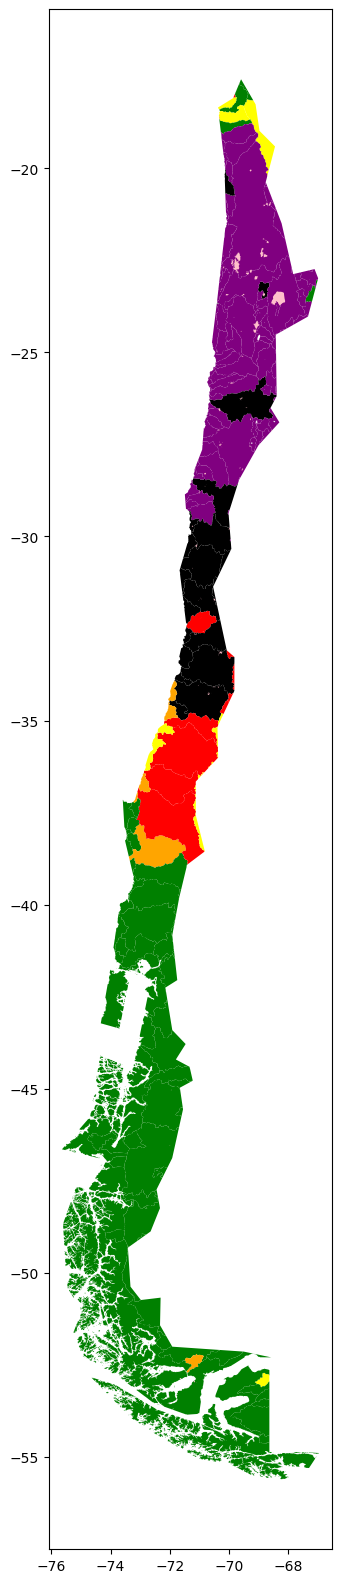

In [8]:
pays = 'Chile'
    
data_country = df.loc[df['COUNTRY_NAME'] == pays]
# data_country.crs # => WGS84 Latitude/Longitude: "EPSG:4326"
    
data_pays = df_total.loc[df_total['name'] == pays]
# data_pays.crs

base_graphe = data_pays.plot(color=data_pays['Color'], figsize=(20, 20)) #result.plot(thisCountry, color=df_stress['Color'], figsize=(20, 20)) #geoplot.polyplot(thisCountry, hue=result['Color'], edgecolor='gray', ax=ax, figsize=(15, 15));
    #base_graphe = data_pays.plot(color='red')
data_country.plot(ax=base_graphe, color='pink');


In [9]:
data_country # polygons miniers

data_pays#.index#.unique() #stress + country limits

,BasinID,dwnBasinID,Area_km2,Shape_Leng,ws2024tr,ws2024tl,ws3024tr,ws3024tl,ws4024tr,ws4024tl,...,sv4038ul,Shape_Le_1,Shape_Area,Color,pop_est,continent,name,iso_a3,gdp_md_est,geometry
16020,13514,0,3034,352000.0,0.458780,High (40-80%),0.509174,High (40-80%),0.510748,High (40-80%),...,Moderate uncertainty,3.241758,0.257916,red,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-69.75006 -17.89323, -69.75053..."
16021,13515,0,28857,1180000.0,0.031719,Low (<10%),0.113642,Low-medium (10-20%),0.209460,Arid and low water use,...,Moderate uncertainty,10.889009,2.465687,yellow,18952038.0,South America,Chile,CHL,282318,"POLYGON ((-68.70426 -20.13779, -68.73301 -20.1..."
16022,13516,0,1334,238000.0,0.181086,Low-medium (10-20%),0.267172,Arid and low water use,0.249005,Arid and low water use,...,Moderate uncertainty,2.210555,0.113604,yellow,18952038.0,South America,Chile,CHL,282318,"POLYGON ((-70.32978 -18.40551, -70.32927 -18.3..."
16023,13851,0,5432,572000.0,9.533460,Arid and low water use,9.332191,Arid and low water use,9.767776,Arid and low water use,...,High uncertainty,5.477461,0.488470,purple,18952038.0,South America,Chile,CHL,282318,"POLYGON ((-69.05593 -25.63258, -69.05779 -25.6..."
16024,13855,0,14865,1016000.0,5.159050,Extremely high (>80%),4.803729,Extremely high (>80%),4.839049,Extremely high (>80%),...,Low uncertainty,9.712157,1.342212,black,18952038.0,South America,Chile,CHL,282318,"POLYGON ((-68.74884 -25.66381, -68.75879 -25.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16226,14791,14746,32519,1698000.0,0.102892,Arid and low water use,0.113856,Arid and low water use,0.133316,Arid and low water use,...,Moderate uncertainty,16.306461,3.029953,purple,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-69.60464 -28.38047, -69.60131..."
16227,14793,14738,10986,772000.0,0.011002,Low (<10%),0.011698,Low (<10%),0.012257,Low (<10%),...,Low uncertainty,8.044084,1.176494,green,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-71.84507 -40.52082, -71.84365..."
16228,14794,14748,7288,742000.0,0.004161,Low (<10%),0.004224,Low (<10%),0.004141,Low (<10%),...,Low uncertainty,8.381735,0.845189,green,18952038.0,South America,Chile,CHL,282318,"POLYGON ((-71.63682 -45.74879, -71.63177 -45.7..."
16229,14855,14738,16868,860000.0,0.004134,Low (<10%),0.004250,Low (<10%),0.004308,Low (<10%),...,Low uncertainty,8.817491,1.774216,green,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-71.26135 -38.81531, -71.24860..."


In [17]:
data_country['AREA'].sum()

3759.6589039441455

In [13]:
df_total_pays = gpd.tools.sjoin(data_country, data_pays, how="left")

In [14]:

dico_hierarchie = {'No data' : 0, 
                   'Low (<10%)': 1, 
                   'Low-medium (10-20%)' : 2, 
                   'Medium-high (20-40%)' : 3, 
                   'High (40-80%)': 4, 
                   'Extremely high (>80%)': 5, 
                   'Arid and low water use' : 6}

conditions2 = [
    (df_total_pays[scenario] == 'No data'),
    (df_total_pays[scenario] == 'Low (<10%)'),
    (df_total_pays[scenario] == 'Low-medium (10-20%)'),
    (df_total_pays[scenario] == 'Medium-high (20-40%)'),
    (df_total_pays[scenario] == 'High (40-80%)'),
    (df_total_pays[scenario] == 'Extremely high (>80%)'),
    (df_total_pays[scenario] == 'Arid and low water use'),
    ]
values2 = [0, 1, 2, 3, 4, 5, 6]


df_total_pays['value_risk'] = np.select(conditions2, values2)
#df_total_mining

df_clean_pays = df_total_pays.sort_values(by='value_risk', ascending = False).drop_duplicates('AREA',keep='first')
df_clean_pays['AREA'].sum()

/opt/mamba/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


3759.658903944146

In [15]:
grouped_bystress_pays = df_clean_pays.groupby(['value_risk']).sum()

#grouped_bystress_pays.iloc[[0]]['AREA'][0]

total_area = grouped_bystress_pays['AREA'].sum()

area_stress = [0] * 7

for i in range(7):
    try:
        area_stress[i] = grouped_bystress_pays.AREA[i]
    except:
        area_stress[i] = 0


No_data = area_stress[0]/total_area*100
Low = area_stress[1]/total_area*100
Low_medium = area_stress[2]/total_area*100
Medium_high = area_stress[3]/total_area*100
High = area_stress[4]/total_area*100
Extremely_high = area_stress[5]/total_area*100
Arid = area_stress[6]/total_area*100

results_agregate_pays = pd.DataFrame.from_dict({
                   'No data' : [No_data], 
                   'Low (<10%)': [Low], 
                   'Low-medium (10-20%)' : [Low_medium], 
                   'Medium-high (20-40%)' : [Medium_high], 
                   'High (40-80%)': [High], 
                   'Extremely high (>80%)': [Extremely_high], 
                   'Arid and low water use' : [Arid]}, orient = "index", columns = ['Percentage'])

results_agregate_pays
#results_agregate_pays['Percentage'].sum()

/tmp/ipykernel_7010/1843274802.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_bystress_pays = df_clean_pays.groupby(['value_risk']).sum()


,Percentage
No data,0.017405
Low (<10%),0.576610
Low-medium (10-20%),0.000000
Medium-high (20-40%),0.000000
High (40-80%),0.124503
Extremely high (>80%),5.793005
Arid and low water use,93.488477


In [24]:
test_Chile_copper

,localities,Latitude,Longitude,points
0,"Mantos Blancos Mine, Antofagasta, Antofagasta ...",-23.438679,-70.063880,POINT (-70.06388 -23.43868)
1,"Suerte Cuarta mine, Magallanes district, Estac...",-23.500000,-69.466667,POINT (-69.46667 -23.50000)
2,"Suerte Sexta mine, Magallanes district, Estaci...",-23.500000,-69.466667,POINT (-69.46667 -23.50000)
3,"Suerte Tercera mine, Magallanes district, Esta...",-23.500000,-69.466667,POINT (-69.46667 -23.50000)
4,"Las Luces Mine, Esperanza district, Antofagast...",-24.266560,-69.583237,POINT (-69.58324 -24.26656)
...,...,...,...,...
92,"Chanabayita mine, Chanabaya, Iquique Province,...",-20.908889,-70.138056,POINT (-70.13806 -20.90889)
93,"Tarapacá Viejo, Iquique Province, Tarapacá, Chile",-19.917414,-69.513611,POINT (-69.51361 -19.91741)
94,"San Oscar mine, Huara, Tamarugal Province, Tar...",-19.597820,-69.662774,POINT (-69.66277 -19.59782)
95,"Ujina deposit, Collahuasi Mine, Collahuasi min...",-20.992778,-68.637222,POINT (-68.63722 -20.99278)


In [11]:
test_Chile_copper = pd.DataFrame(
    {'localities' : ['Mantos Blancos Mine, Antofagasta, Antofagasta Province, Antofagasta, Chile','Suerte Cuarta mine, Magallanes district, Estaci\u00f3n Cerro Negro, Cerro Palestina, Antofagasta Province, Antofagasta, Chile estimated]','Suerte Sexta mine, Magallanes district, Estaci\u00f3n Cerro Negro, Cerro Palestina, Antofagasta Province, Antofagasta, Chile estimated]','Suerte Tercera mine, Magallanes district, Estaci\u00f3n Cerro Negro, Cerro Palestina, Antofagasta Province, Antofagasta, Chile estimated]','Las Luces Mine, Esperanza district, Antofagasta Province, Antofagasta, Chile estimated]','Juarez Mine, Michilla District, Antofagasta Province, Antofagasta, Chile estimated]','Michilla Mine, Michilla District, Antofagasta Province, Antofagasta, Chile','Susana Mine, Michilla District, Antofagasta Province, Antofagasta, Chile estimated]','Angela mine, Sierra Gorda, Antofagasta Province, Antofagasta, Chile estimated]','Bella Santiaguina mine, Sierra Gorda, Antofagasta Province, Antofagasta, Chile estimated]','Codiciada mine, Sierra Gorda, Antofagasta Province, Antofagasta, Chile estimated]','Estaca mine, Sierra Gorda, Antofagasta Province, Antofagasta, Chile estimated]','Etna mine, Sierra Gorda, Antofagasta Province, Antofagasta, Chile estimated]','Laura mine, Sierra Gorda, Antofagasta Province, Antofagasta, Chile estimated]','San Antonio mine, Sierra Gorda, Antofagasta Province, Antofagasta, Chile estimated]','Santo Domingo Cu-(Ag) deposit, Taltal, Antofagasta Province, Antofagasta, Chile estimated]','Vaca Muerta meteorite, Taltal, Antofagasta Province, Antofagasta, Chile','El Abra Mine, El Loa Province, Antofagasta, Chile','La Escondida Mine, Escondida, El Loa Province, Antofagasta, Chile','Escondida Norte deposit, La Escondida Mine, Escondida, El Loa Province, Antofagasta, Chile','San Bartolo mine, San Bartolo district, El Loa Province, Antofagasta, Chile','Tuina Mine, San Jose, El Loa Province, Antofagasta, Chile estimated]','Buena Esperanza mine, Punta Blanca area, Tocopilla Province, Antofagasta, Chile estimated]','Mantos de la Luna Cu-(Ag) deposit, Punta Blanca area, Tocopilla Province, Antofagasta, Chile','Cobija meteorite, Tocopilla, Tocopilla Province, Antofagasta, Chile','Judith mine, Caballo Muerto mining district, Cha\u00f1aral Province, Atacama, Chile estimated]','Flor de Tulip\u00e1n mine, El Salado, Cha\u00f1aral, Cha\u00f1aral Province, Atacama, Chile estimated]','Manto Cuba Mine, San Pedro de Cachiyuyo mining district, Inca de Oro mining district, Cha\u00f1aral Province, Atacama, Chile','Santo Domingo Mine, Cha\u00f1aral Province, Atacama, Chile','Azufrada mine, Copiap\u00f3 Province, Atacama, Chile estimated]','Batea Mine, Copiap\u00f3 Province, Atacama, Chile estimated]','Estrella mine, Cabeza de Vaca mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','Japonesa Mine, Cabeza de Vaca mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','Lucero mine, Cabeza de Vaca mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','Manto Barnes mine, Cabeza de Vaca mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','Negrita mine, Cabeza de Vaca mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','San Eduardo mine, Cabeza de Vaca mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','San Pablo mine, Cabeza de Vaca mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','Quebrada Seca Mine, Quebrada Seca, Caldera, Copiap\u00f3 Province, Atacama, Chile estimated]','Descubridora mine, Checo de Cobre mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','Mandiola mine, Checo de Cobre mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','San Samuel Mine, Carrera Pinto, Cachiyuyo de Llampos mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile','Dulcinea de Llampos Mine, Cachiyuyo de Llampos mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile','Amarilla Mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Aniversario Gal\u00e9s mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Arenilla mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Carmen Alto mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Casualidad mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Farellones mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Linderos mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Pe\u00f1on mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Pe\u00f1oncito mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Polemica mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Quebradita mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Rinc\u00f3n mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Rosario mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','San Pedro mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Santa F\u00e9 mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Sara mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','Vizcacha Alta mine, Cerro Blanco mining district, Copiap\u00f3, Copiap\u00f3 Province, Atacama, Chile estimated]','La Leona mine, Copiap\u00f3 Province, Atacama, Chile estimated]','La Turca mine, Copiap\u00f3 Province, Atacama, Chile estimated]','Descubridora mine, San Antonio district, Potrero Grande, Copiap\u00f3 Province, Atacama, Chile estimated]','Gu\u00edas de Picones, San Antonio district, Potrero Grande, Copiap\u00f3 Province, Atacama, Chile estimated]','Farell\u00f3n mine, Puquios mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','Sofia Mine, Puquios mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','Carolina mine, Sierra Desierto mining district, Copiap\u00f3 Province, Atacama, Chile estimated]','Socav\u00f3n Rampa Mine, Copiap\u00f3 Province, Atacama, Chile estimated]','Carmen Bajo Mine, Candelaria Copper mining complex, Tierra Amarilla, Copiap\u00f3 Province, Atacama, Chile','La Farola Mine, Cerro Pintado, Las Pintadas mining district, Tierra Amarilla, Copiap\u00f3 Province, Atacama, Chile','Jote Mine, Pampa Larga mining district, Tierra Amarilla, Copiap\u00f3 Province, Atacama, Chile','Veta Negra Mine, Pampa Larga mining district, Tierra Amarilla, Copiap\u00f3 Province, Atacama, Chile','Angela Mine, El Orito district, Huasco Province, Atacama, Chile estimated]','Turin mine, El Orito district, Huasco Province, Atacama, Chile estimated]','Verdona mine, El Morado district, Freirina, Huasco Province, Atacama, Chile estimated]','Lolita mine, Sierra Perdices, Freirina, Huasco Province, Atacama, Chile estimated]','Sierra Totorita mine, Sierra Perdices, Freirina, Huasco Province, Atacama, Chile estimated]','Los Pelambres Mine, Salamanca, Choapa Province, Chile','Carmen de Andacollo mine, Andacollo, Elqui Province, Coquimbo, Chile','Churrumata mine, Andacollo, Elqui Province, Coquimbo, Chile estimated]','Canto Sur Mine, El Indio deposit, Elqui Province, Coquimbo, Chile estimated]','Casus mine, La Higuera, Elqui Province, Coquimbo, Chile estimated]','Volcano mine, Los Choros, La Higuera, Elqui Province, Coquimbo, Chile estimated]','Porvenir mine, La Higuera, Elqui Province, Coquimbo, Chile estimated]','El Romeral mine, La Serena, Elqui Province, Coquimbo, Chile','Potrerillos mine, Punta Colorada-Agua Grande, Elqui Province, Coquimbo, Chile estimated]','El Cisne mine, Vicu\u00f1a, Elqui Province, Coquimbo, Chile estimated]','El Pique Mine, Tamaya, Coquimbo, Chile estimated]','Porvenir mine, Cerro Desesperado, Llanquihue Province, Los Lagos, Chile estimated]','Teniente Mine, El Teniente, Rancagua, Cachapoal Province, OHiggins, Chile','Los Bronces Mine, Santiago Province, Santiago, Chile','La Africana Mine, Pudahuel, Santiago Province, Santiago, Chile','Chanabayita mine, Chanabaya, Iquique Province, Tarapac\u00e1, Chile','Tarapac\u00e1 Viejo, Iquique Province, Tarapac\u00e1, Chile','San Oscar mine, Huara, Tamarugal Province, Tarapac\u00e1, Chile estimated]','Ujina deposit, Collahuasi Mine, Collahuasi mining district, Pica, Tamarugal Province, Tarapac\u00e1, Chile','Quebrada Blanca Mine, Collahuasi mining district, Pica, Tamarugal Province, Tarapac\u00e1, Chile'],
     'Latitude': [-23.438679089724,-23.5,-23.5,-23.5,-24.26656049376836,-24.26656049376836,-22.7122222222,-24.26656049376836,-23.260655519418293,-23.260655519418293,-23.260655519418293,-23.260655519418293,-23.260655519418293,-23.260655519418293,-23.260655519418293,-25.313990480738717,-25.75,-21.9205555556,-24.215226560131,-24.215226560131,-22.7333388889,-22.87215282213752,-22.038354205013118,-22.255,-22.5666666667,-26.26848966159736,-26.402519519756,-26.745277777778,-26.459880203952,-27.4938581595718,-27.488248721605057,-27.4938581595718,-27.4938581595718,-27.4938581595718,-27.4938581595718,-27.4938581595718,-27.4938581595718,-27.4938581595718,-27.28620602654732,-27.4938581595718,-27.4938581595718,-27.072222222222,-27.1483333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-28.0333333333,-27.4938581595718,-27.4938581595718,-27.4938581595718,-27.4938581595718,-27.4938581595718,-27.4938581595718,-27.4938581595718,-27.488248721605057,-27.5144890251,-27.5902777778,-27.608611111111,-27.600833333333,-28.778372274386694,-28.778372274386694,-28.855366133613426,-28.855366133613426,-28.855366133613426,-31.7138888889,-30.241578766321,-30.146701390937913,-29.826554844550675,-29.364180833372252,-29.364180833372252,-29.364180833372252,-29.721944,-29.826554844550675,-29.944252257224843,-30.618721950716676,-41.393796876098804,-34.0886111111,-33.149265422398,-33.46013283253,-20.9088888889,-19.917414,-19.597819911805622,-20.9927777778,-21.00168271738],
     'Longitude': [-70.063880248825,-69.4666666667,-69.4666666667,-69.4666666667,-69.58323743261595,-69.58323743261595,-70.1919444444,-69.58323743261595,-69.30737908188725,-69.30737908188725,-69.30737908188725,-69.30737908188725,-69.30737908188725,-69.30737908188725,-69.30737908188725,-69.86439622165337,-70.05,-68.8325,-69.060970544815,-69.060970544815,-68.2333222222,-68.19199298534005,-69.55826551991508,-70.1455555556,-70.25,-69.4532114763244,-69.898142358985,-69.833888888889,-70.005039721727,-69.87934790234978,-69.870131790559,-69.87934790234978,-69.87934790234978,-69.87934790234978,-69.87934790234978,-69.87934790234978,-69.87934790234978,-69.87934790234978,-70.71313753763532,-69.87934790234978,-69.87934790234978,-69.989166666667,-69.9616666667,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-70.1333333333,-69.87934790234978,-69.87934790234978,-69.87934790234978,-69.87934790234978,-69.87934790234978,-69.87934790234978,-69.87934790234978,-69.870131790559,-70.2883955425,-70.35,-70.156388888889,-70.163055555556,-70.55623050674018,-70.55623050674018,-71.1907867076123,-71.1907867076123,-71.1907867076123,-70.4888888889,-71.102801250415,-70.88484275086604,-70.7302504825319,-70.9295847073345,-70.9295847073345,-70.9295847073345,-71.235833,-70.7302504825319,-70.32563867316857,-70.8604553135379,-72.77471255409921,-70.4625,-70.280914306641,-70.814130020142,-70.1380555556,-69.513611,-69.6627737510583,-68.6372222222,-68.808583068848]
    })


#test_Chile_copper["points"]= Point(test_Chile_copper['Latitude'],test_Chile_copper['Longitude'])

test_Chile_copper["points"] = (gpd.points_from_xy(test_Chile_copper.Longitude, test_Chile_copper.Latitude , crs="EPSG:4326"))

points_Chile_copper = gpd.GeoDataFrame(test_Chile_copper[["localities","points"]], geometry='points')#test_Chile_copper[["localities","geometry"]]

points_Chile_copper#.dtypes
# points_Chile_copper.crs # WSG 84

,localities,points
0,"Mantos Blancos Mine, Antofagasta, Antofagasta ...",POINT (-70.06388 -23.43868)
1,"Suerte Cuarta mine, Magallanes district, Estac...",POINT (-69.46667 -23.50000)
2,"Suerte Sexta mine, Magallanes district, Estaci...",POINT (-69.46667 -23.50000)
3,"Suerte Tercera mine, Magallanes district, Esta...",POINT (-69.46667 -23.50000)
4,"Las Luces Mine, Esperanza district, Antofagast...",POINT (-69.58324 -24.26656)
...,...,...
92,"Chanabayita mine, Chanabaya, Iquique Province,...",POINT (-70.13806 -20.90889)
93,"Tarapacá Viejo, Iquique Province, Tarapacá, Chile",POINT (-69.51361 -19.91741)
94,"San Oscar mine, Huara, Tamarugal Province, Tar...",POINT (-69.66277 -19.59782)
95,"Ujina deposit, Collahuasi Mine, Collahuasi min...",POINT (-68.63722 -20.99278)


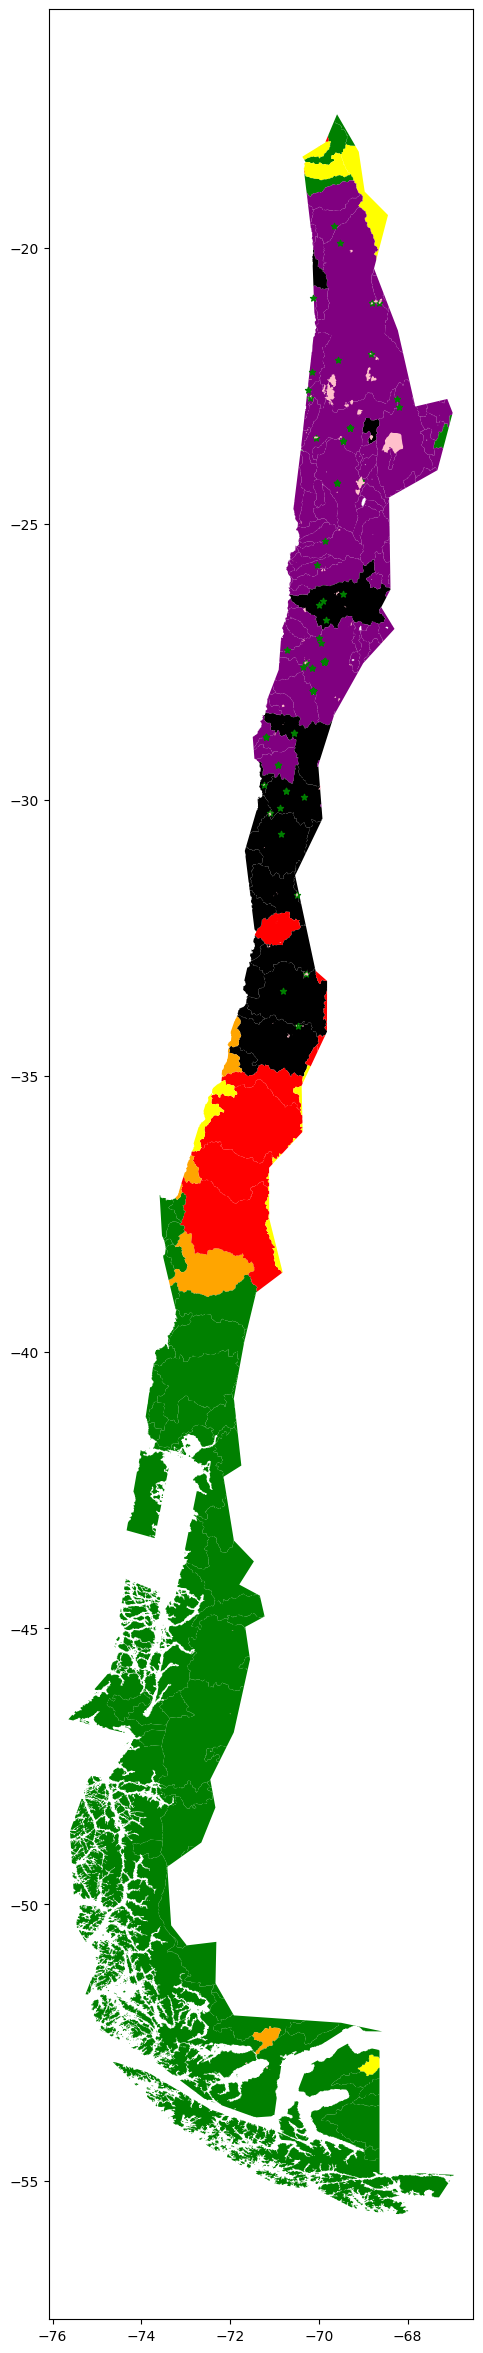

In [7]:
base_graphe = data_pays.plot(color=data_pays['Color'], figsize=(30, 30)) #result.plot(thisCountry, color=df_stress['Color'], figsize=(20, 20)) #geoplot.polyplot(thisCountry, hue=result['Color'], edgecolor='gray', ax=ax, figsize=(15, 15));
    #base_graphe = data_pays.plot(color='red')
points_Chile_copper.plot(ax=base_graphe, marker='*', color='green', markersize=20);
data_country.plot(ax=base_graphe, color='pink');

In [ ]:
# associer à chaque point un polygone issu de data_country

# points_Chile_copper -> 97 points
# data_country = 227 polygones

In [115]:
ind = list(points_Chile_copper.index.values)
polygons_proches = [0] * 97
df_polygons_proches = pd.DataFrame({'index':ind,'geometry':polygons_proches})
df_polygons_proches

,index,geometry
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
92,92,0
93,93,0
94,94,0
95,95,0


In [120]:
for row in points_Chile_copper:
    i = 0
    i = i+1
    df_polygons_proches.iloc[[0]]['geometry'][0]=i
    
    
df_polygons_proches

/tmp/ipykernel_6078/338748931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_polygons_proches.iloc[[0]]['geometry'][0]=i


,index,geometry
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
92,92,1
93,93,1
94,94,1
95,95,1


In [80]:
ind = list(points_Chile_copper.index.values)
polygons_proches = [] * 97
df_polygons_proches = pd.DataFrame({'index':ind,'geometry':polygons_proches})

for row in points_Chile_copper:
    liste_distances = [10000] * 227
    for i in range(227):
        liste_distance[i] = #distance point-polygone
    
    polygons_proches[row] = min(liste_distance)
    
points_Chile_copper['polygon_proche']= polygons_proches

0     Mantos Blancos Mine, Antofagasta, Antofagasta ...
1     Suerte Cuarta mine, Magallanes district, Estac...
2     Suerte Sexta mine, Magallanes district, Estaci...
3     Suerte Tercera mine, Magallanes district, Esta...
4     Las Luces Mine, Esperanza district, Antofagast...
                            ...                        
92    Chanabayita mine, Chanabaya, Iquique Province,...
93    Tarapacá Viejo, Iquique Province, Tarapacá, Chile
94    San Oscar mine, Huara, Tamarugal Province, Tar...
95    Ujina deposit, Collahuasi Mine, Collahuasi min...
96    Quebrada Blanca Mine, Collahuasi mining distri...
Name: localities, Length: 97, dtype: object
0     POINT (-70.06388 -23.43868)
1     POINT (-69.46667 -23.50000)
2     POINT (-69.46667 -23.50000)
3     POINT (-69.46667 -23.50000)
4     POINT (-69.58324 -24.26656)
                 ...             
92    POINT (-70.13806 -20.90889)
93    POINT (-69.51361 -19.91741)
94    POINT (-69.66277 -19.59782)
95    POINT (-68.63722 -20.99278)


In [91]:
len(list(points_Chile_copper.index.values))

97

In [ ]:
data_pays['is_in'] = test_Chile_copper['points'].within(data_pays['geometry'])

In [ ]:
data_overlaps=gpd.GeoDataFrame(crs=df_total_mining.crs)
for index, row in df_total_mining.iterrows():
    data_temp1=df_total_mining.loc[df_total_mining.field_id!=row.field_id,]

# check if intersection occured
overlaps=data_temp1[data_temp1.geometry.overlaps(row.geometry)]['field_id'].tolist()
if len(overlaps)>0:
    temp_list=[]
    print(overlaps)

In [ ]:
data_pays['geometry'].contains(points_Chile_copper['points'], align=True)#.unique()

In [77]:
data_country

,ISO3_CODE,COUNTRY_NAME,AREA,geometry
816,CHL,Chile,7.960813,"POLYGON ((-71.65180 -52.86716, -71.64202 -52.8..."
819,CHL,Chile,0.624550,"POLYGON ((-71.10592 -52.98477, -71.10111 -52.9..."
820,CHL,Chile,9.397315,"POLYGON ((-71.20093 -52.95888, -71.18892 -52.9..."
1413,CHL,Chile,0.030374,"POLYGON ((-71.98996 -46.54159, -71.98970 -46.5..."
1415,CHL,Chile,0.048363,"POLYGON ((-71.98263 -46.54072, -71.98214 -46.5..."
...,...,...,...,...
3783,CHL,Chile,0.437397,"POLYGON ((-68.83561 -22.37827, -68.83561 -22.3..."
3841,CHL,Chile,778.709041,"POLYGON ((-69.65564 -22.58954, -69.64783 -22.5..."
3844,CHL,Chile,0.073772,"POLYGON ((-68.83834 -22.37109, -68.83759 -22.3..."
3846,CHL,Chile,82.473927,"POLYGON ((-68.82420 -22.37167, -68.81802 -22.3..."


In [23]:
point_check = points_Chile_copper.iloc[[0]]['points']

polygon_index = data_country['geometry'].to_crs({'init': 'epsg:3857'}).distance(point_check.to_crs({'init': 'epsg:3857'})).sort_values()#.index[0]
polygon_index.unique()
#for i in data_country['geometry']:

min_poly = min(data_country['geometry'], key=point_check.distance)
min_poly

/opt/mamba/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/mamba/lib/python3.10/site-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
/tmp/ipykernel_7010/3839661349.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  min_poly = min(data_country['geometry'], key=point_check.distance)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# calcul areas polygons miniers
# df = gpd.read_file(myzip.open('global_mining_polygons_v1.gpkg'))
# df.crs

df_plane = df.copy()
df_plane= df_plane.to_crs({'init': 'epsg:3857'})
#df_plane.crs
df_plane['area2']=df_plane['geometry'].area/ 10**6
df_plane['area2'].sum()

### ne confirme pas les surfaces du 
#df['area2']=df['geometry'].area* 10**4 #semble le plus proche
#message d'erreur car non projeté

In [19]:
distances = list()

for i in points_Chile_copper['points']:
    for j in data_country:
        distances.append(i.distance(j))
    print(min(distances))
    
    

AttributeError: 'str' object has no attribute '_geom'

In [ ]:
data_country

In [ ]:
#Idée modélisation : prendre colonnes chiffrées dans df_stress et comparer évolution stress hydrique entre zones minières et non-minières